In [2]:
import pickle
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import adfuller
from scipy.optimize import least_squares

In [57]:
#Import CoinAPI price data
prices = json.load(open("THREEMONTHPRICES.json", "r"))
prices = pd.read_json(prices)

In [58]:
#Import Reddit sentiment data
sentiments = json.load(open("sentiments.json", "r"))
sentiments = pd.read_json(sentiments)
sentiments = sentiments.sort_index()

In [5]:
#Import Binance API price data
#priceFile = open("PRICES_-1.txt", "rb")
#pricesResponse = pickle.load(priceFile)
#prices = pd.DataFrame.from_dict(pricesResponse.json())

In [59]:
prices

,time_period_start,time_period_end,time_open,time_close,rate_open,rate_high,rate_low,rate_close
0,2022-03-01T00:00:00.0000000Z,2022-03-01T00:05:00.0000000Z,2022-03-01T00:00:00.0000000Z,2022-03-01T00:04:00.0000000Z,2923.734353,2941.463616,2922.638524,2941.463616
1,2022-03-01T00:05:00.0000000Z,2022-03-01T00:10:00.0000000Z,2022-03-01T00:05:00.0000000Z,2022-03-01T00:09:00.0000000Z,2953.592158,2953.592158,2941.643950,2941.643950
2,2022-03-01T00:10:00.0000000Z,2022-03-01T00:15:00.0000000Z,2022-03-01T00:10:00.0000000Z,2022-03-01T00:14:00.0000000Z,2944.697216,2968.066080,2944.697216,2961.057098
3,2022-03-01T00:15:00.0000000Z,2022-03-01T00:20:00.0000000Z,2022-03-01T00:15:00.0000000Z,2022-03-01T00:19:00.0000000Z,2959.888443,2959.888443,2934.776855,2934.776855
4,2022-03-01T00:20:00.0000000Z,2022-03-01T00:25:00.0000000Z,2022-03-01T00:20:00.0000000Z,2022-03-01T00:24:00.0000000Z,2938.013182,2942.884575,2938.013182,2940.818153
...,...,...,...,...,...,...,...,...
26203,2022-05-30T23:35:00.0000000Z,2022-05-30T23:40:00.0000000Z,2022-05-30T23:35:00.0000000Z,2022-05-30T23:39:00.0000000Z,1993.328431,1993.328431,1991.957896,1992.162514
26204,2022-05-30T23:40:00.0000000Z,2022-05-30T23:45:00.0000000Z,2022-05-30T23:40:00.0000000Z,2022-05-30T23:44:00.0000000Z,1993.205264,1995.663311,1993.074735,1993.074735
26205,2022-05-30T23:45:00.0000000Z,2022-05-30T23:50:00.0000000Z,2022-05-30T23:45:00.0000000Z,2022-05-30T23:49:00.0000000Z,1993.914274,1993.914274,1991.981685,1991.981685
26206,2022-05-30T23:50:00.0000000Z,2022-05-30T23:55:00.0000000Z,2022-05-30T23:50:00.0000000Z,2022-05-30T23:54:00.0000000Z,1991.975822,1996.060805,1991.975822,1996.060805


In [60]:
sentiments

,Sentiment
2022-03-01,18.727871
2022-03-08,17.852578
2022-03-15,18.548325
2022-03-22,16.150478
2022-03-29,19.792743
2022-04-05,22.470563
2022-04-12,14.318076
2022-04-19,17.649509
2022-04-26,19.023857
2022-05-03,14.056733


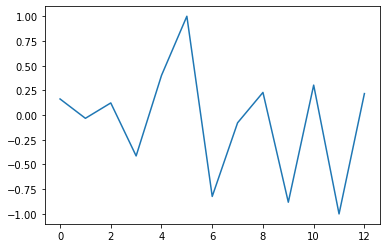

In [61]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaledWeeklySentiments = scaler.fit_transform(sentiments)
plt.plot(scaledWeeklySentiments)

In [62]:
#Parse Coin API data into one Series of open and close prices
priceIntervals = []
for i in prices.index:
  priceIntervals.append(prices['rate_open'][i])
  priceIntervals.append(prices['rate_close'][i])
priceIntervals = pd.Series(priceIntervals)

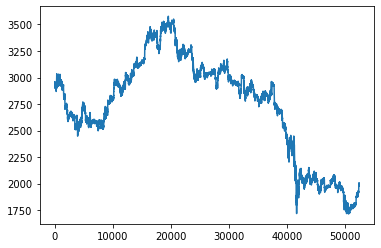

In [63]:
plt.plot(priceIntervals)

In [11]:
augmentedDickeyFullerResultPrices = adfuller(priceIntervals)
print('ADF Statistic: ', augmentedDickeyFullerResultPrices[0])
print('p-value: ', augmentedDickeyFullerResultPrices[1])
print('Critical Values:')
for key, val in augmentedDickeyFullerResultPrices[4].items():
  print(f'{key}: {val}')

ADF Statistic:  -0.43160968866956756
p-value:  0.9046858147351748
Critical Values:
1%: -3.4304748662581406
5%: -2.861595188376793
10%: -2.566799374938127


In [12]:
augmentedDickeyFullerResultSentiments = adfuller(pd.Series(sentiments['Sentiment']))
print('ADF Statistic: ', augmentedDickeyFullerResultSentiments[0])
print('p-value: ', augmentedDickeyFullerResultSentiments[1])
print('Critical Values:')
for key, val in augmentedDickeyFullerResultSentiments[4].items():
  print(f'{key}: {val}')

ADF Statistic:  -4.9809260377060784
p-value:  2.4205258904452943e-05
Critical Values:
1%: -4.137829282407408
5%: -3.1549724074074077
10%: -2.7144769444444443


In [64]:
#Calculate daily realized power
#There are 288 5-minute intervals in 24 hours (12 5-minute intervals per hour times 24 hours)
#priceIntervals has 2 data points for each 5-minute interval, the rate_close of the previous and the rate_open of the next
dailyRealizedPower = []
for i in range(91):
  #91 days in price data
  accumulatingRealizedPower = 0
  for j in range(288):
    #288 5-minute intervals in each day
    index = 576 * i + 2 * j
    accumulatingRealizedPower += (math.log(priceIntervals[index + 1]) - math.log(priceIntervals[index]))
  dailyRealizedPower.append(accumulatingRealizedPower)
dailyRealizedPower = pd.Series(dailyRealizedPower)

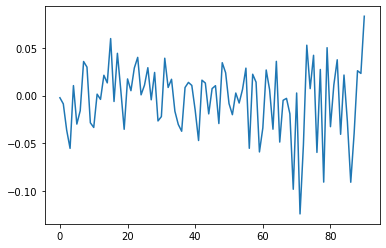

In [65]:
plt.plot(dailyRealizedPower)

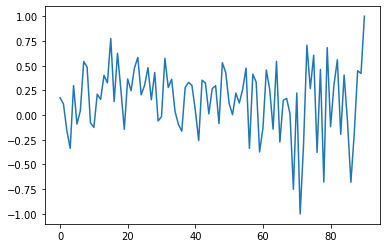

In [66]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaledDailyRealizedPower = scaler.fit_transform(dailyRealizedPower.to_frame())
plt.plot(scaledDailyRealizedPower)

In [16]:
augmentedDickeyFullerResultPower = adfuller(scaledDailyRealizedPower.flatten())
print('ADF Statistic: ', augmentedDickeyFullerResultPower[0])
print('p-value: ', augmentedDickeyFullerResultPower[1])
print('Critical Values:')
for key, val in augmentedDickeyFullerResultPower[4].items():
  print(f'{key}: {val}')

ADF Statistic:  -1.8802391630192714
p-value:  0.34141356473888956
Critical Values:
1%: -3.512738056978279
5%: -2.8974898650628984
10%: -2.585948732897085


In [67]:
#Calculate daily log quadratic variation volatility
#There are 288 5-minute intervals in 24 hours (12 5-minute intervals per hour times 24 hours)
#priceIntervals has 2 data points for each 5-minute interval, the rate_close of the previous and the rate_open of the next
dailyLogQV = []
for i in range(91):
  #91 days in price data
  accumulatingQV = 0
  for j in range(288):
    #288 5-minute intervals in each day
    index = 576 * i + 2 * j
    accumulatingQV += (math.log(priceIntervals[index + 1]) - math.log(priceIntervals[index])) ** 2
  dailyLogQV.append(math.log(accumulatingQV))
dailyLogQV = pd.Series(dailyLogQV)

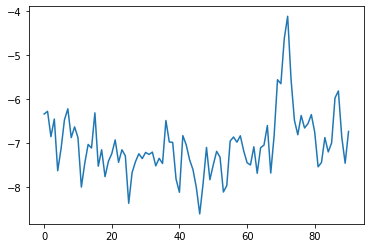

In [68]:
plt.plot(dailyLogQV)

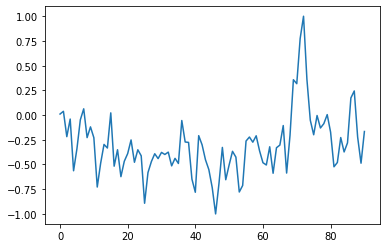

In [287]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaledDailyLogQV = scaler.fit_transform(dailyLogQV.to_frame())
plt.plot(scaledDailyLogQV)

maxLogQV = dailyLogQV.max()
minLogQV = dailyLogQV.min()

In [214]:
augmentedDickeyFullerResultLogQV = adfuller(scaledDailyLogQV.flatten())
print('ADF Statistic: ', augmentedDickeyFullerResultLogQV[0])
print('p-value: ', augmentedDickeyFullerResultLogQV[1])
print('Critical Values:')
for key, val in augmentedDickeyFullerResultLogQV[4].items():
  print(f'{key}: {val}')

ADF Statistic:  -4.3589309353980985
p-value:  0.00035065104938148377
Critical Values:
1%: -3.505190196159122
5%: -2.894232085048011
10%: -2.5842101234567902


In [21]:
#High-frequency data to be predicted: volatility (daily log quadratic variation)
#High-frequency data to be regressors: daily realized power
#Low-frequency data to be regressor: weekly Reddit sentiment

In [70]:
sentiments.index = sentiments.index.strftime('%m/%d/%Y')

In [205]:
scaledSentiments = pd.DataFrame(data=scaledWeeklySentiments, index=sentiments.index)

In [206]:
scaledSentiments

,0
03/01/2022,0.163055
03/08/2022,-0.032679
03/15/2022,0.122904
03/22/2022,-0.413305
03/29/2022,0.401183
04/05/2022,1.000000
04/12/2022,-0.823069
04/19/2022,-0.078090
04/26/2022,0.229243
05/03/2022,-0.881511


In [215]:
datesRows = [f'03/{i}/2022' if i >= 10 else f'03/0{i}/2022' for i in range(1, 32)]
datesRows.extend([f'04/{i}/2022' if i >= 10 else f'04/0{i}/2022' for i in range(1, 31)])
datesRows.extend([f'05/{i}/2022' if i >= 10 else f'05/0{i}/2022' for i in range(1, 31)])
powers = pd.DataFrame(columns = ['Daily Realized Power'], index=datesRows)
powers.loc[:,'Daily Realized Power'] = scaledDailyRealizedPower
QVs = pd.DataFrame(columns = ['Daily Log QV'], index=datesRows)
QVs.loc[:,'Daily Log QV'] = scaledDailyLogQV

In [302]:
logQVDated = dailyLogQV.to_frame()
logQVDated.index = datesRows

In [303]:
logQVDated

,0
03/01/2022,-6.337816
03/02/2022,-6.275525
03/03/2022,-6.852083
03/04/2022,-6.451797
03/05/2022,-7.626649
...,...
05/26/2022,-5.971904
05/27/2022,-5.813139
05/28/2022,-6.861423
05/29/2022,-7.454688


In [216]:
powers.iloc[:15]

,Daily Realized Power
03/01/2022,0.175253
03/02/2022,0.113442
03/03/2022,-0.152575
03/04/2022,-0.336841
03/05/2022,0.298249
03/06/2022,-0.091152
03/07/2022,0.043806
03/08/2022,0.542172
03/09/2022,0.485509
03/10/2022,-0.077880


In [217]:
QVs

,Daily Log QV
03/01/2022,0.010492
03/02/2022,0.038229
03/03/2022,-0.218495
03/04/2022,-0.040260
03/05/2022,-0.563385
...,...
05/26/2022,0.173422
05/27/2022,0.244115
05/28/2022,-0.222654
05/29/2022,-0.486816


In [219]:
#y variable: high frequency volatility (QVs)
#yl variable: lagged y variable (lagged QVs)
#x variable: 1. high frequency daily realized power 2. low frequency sentiment
#Mix Frequencies: for all high frequency data, rearrange into each row is all the high frequency data points within one low frequency interval
horizon = 7
xlag = 0
x_rows = []
for date in scaledSentiments.index:
  start = powers.index.get_loc(date, method='bfill')
  startI = max(0, start - horizon)
  endI = max(0, start)
  a = np.array([value for value in powers.iloc[startI : endI].values])
  a = np.flip(np.array([v[0] for v in a]))
  a = np.append(a, scaledSentiments.loc[date])
  b = np.array([value for value in QVs.iloc[startI : endI].values])
  b = np.flip(np.array([v[0] for v in b]))
  b = np.append(a, b)
  x_rows.append(b)
allx = pd.DataFrame(data=x_rows, index=scaledSentiments.index)


In [221]:
x = allx.iloc[1:-1]
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
03/08/2022,0.043806,-0.091152,0.298249,-0.336841,-0.152575,0.113442,0.175253,-0.032679,-0.047861,-0.339078,-0.563385,-0.040260,-0.218495,0.038229,0.010492
03/15/2022,0.402753,0.158805,0.211770,-0.125328,-0.077880,0.485509,0.542172,0.122904,-0.296985,-0.488703,-0.727992,-0.229096,-0.119376,-0.227966,0.063399
03/22/2022,0.365743,-0.143719,0.252372,0.624920,0.137466,0.774047,0.325794,-0.413305,-0.389565,-0.467122,-0.623070,-0.350698,-0.516968,0.022343,-0.333210
03/29/2022,0.154633,0.479346,0.301790,0.204986,0.583974,0.476457,0.246862,0.401183,-0.471227,-0.581672,-0.892264,-0.411958,-0.351013,-0.477495,-0.251489
04/05/2022,0.038687,0.362253,0.279474,0.575270,-0.015499,-0.059344,0.431314,1.000000,-0.437656,-0.513848,-0.374703,-0.398504,-0.377701,-0.440466,-0.391149
04/12/2022,-0.257256,0.048886,0.299988,0.330673,0.279122,-0.163595,-0.094697,-0.823069,-0.208153,-0.780905,-0.648215,-0.276555,-0.272195,-0.055025,-0.489657
04/19/2022,0.529958,-0.085590,0.297362,0.268029,0.012036,0.324207,0.353082,-0.078090,-0.327148,-0.690651,-1.000000,-0.733829,-0.551560,-0.451743,-0.300593
04/26/2022,0.474966,0.260363,0.121859,0.223065,0.003876,0.116744,0.428132,0.229243,-0.262465,-0.712490,-0.778173,-0.425515,-0.366634,-0.504048,-0.654095
05/03/2022,0.257200,0.456094,-0.130517,-0.372906,0.333104,0.413158,-0.336224,-0.881511,-0.320725,-0.504932,-0.481873,-0.362096,-0.209534,-0.274223,-0.222106
05/10/2022,-0.750526,0.012821,0.169068,0.149705,-0.273104,0.543616,-0.142917,0.303206,0.357696,-0.206509,-0.586588,-0.106016,-0.303763,-0.330311,-0.588641


In [222]:
y_rows = []
for date in x.index:
  y_rows.append(QVs.loc[date])
y = pd.DataFrame(data=y_rows, index=x.index)

In [223]:
y

,Daily Log QV
03/08/2022,0.063399
03/15/2022,-0.333210
03/22/2022,-0.251489
03/29/2022,-0.391149
04/05/2022,-0.489657
04/12/2022,-0.300593
04/19/2022,-0.654095
04/26/2022,-0.222106
05/03/2022,-0.588641
05/10/2022,0.317656


In [115]:
class AlmonWeights():
  def __init__(self, theta1, theta2):
    self.theta1 = theta1
    self.theta2 = theta2

  def weights(self, nlags):
    ilag = np.arange(1, nlags + 1)
    z = np.exp(self.theta1 * ilag + self.theta2 * ilag ** 2)
    return z / sum(z)
  
  def x_weighted(self, x, params):
    self.theta1, self.theta2 = params
    w = self.weights(x.shape[1])
    return np.dot(x, w), np.tile(w.T, (x.shape[1], 1))
  
  @property
  def num_params(self):
    return 2
  
  @staticmethod
  def init_params():
    return np.array([-1., 0.])

In [197]:
#Sum of Squared Residuals
def ssr(a, x, y, weight_method):
  xw, _ = weight_method.x_weighted(x, a[:2])

  error = y - a[0] - a[1] * xw
  error = sum(error)
  return error

In [209]:
def estimate(x, y):
  weight_method = AlmonWeights(-1., 0.)
  newx = np.concatenate([np.ones((len(x), 2)), x], axis=1)
  lstsqSol = np.linalg.lstsq(newx, y)[0]
  
  f = lambda v: ssr(v, x.values, y.values, weight_method)
  lstsqSol = lstsqSol.reshape(len(lstsqSol))
  opt_res = least_squares(f, lstsqSol)

  return opt_res

In [224]:
res = estimate(x, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [225]:
res.x

array([-2.70942375e-01,  1.89567494e-09,  1.57628026e-01, -1.13200711e-01,
        1.00599373e-01, -1.62223322e-01,  2.57971926e-01,  3.25011246e-02,
        8.76137295e-02,  1.98312689e-01,  5.77950777e-01,  3.45517399e-01,
       -3.18236952e-01,  8.33816815e-01, -1.97609124e-02,  5.13764469e-01,
       -6.95075874e-01])

In [270]:
x_rows = []
for date in QVs.iloc[-7:].index:
  start = powers.index.get_loc(date, method='bfill')
  startI = max(0, start - horizon)
  endI = max(0, start)
  a = np.array([value for value in powers.iloc[startI : endI].values])
  a = np.flip(np.array([v[0] for v in a]))
  a = np.append(a, scaledSentiments.iloc[-1])
  b = np.array([value for value in QVs.iloc[startI : endI].values])
  b = np.flip(np.array([v[0] for v in b]))
  b = np.append(a, b)
  x_rows.append(b)
xf = pd.DataFrame(data=x_rows, index=QVs[-7:].index)

In [271]:
xf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
05/24/2022,-0.194525,0.559527,0.305426,-0.117401,0.681851,-0.678151,0.461324,0.217473,-0.227395,-0.479799,-0.523061,-0.172734,0.004744,-0.086905,-0.130483
05/25/2022,0.405109,-0.194525,0.559527,0.305426,-0.117401,0.681851,-0.678151,0.217473,-0.372945,-0.227395,-0.479799,-0.523061,-0.172734,0.004744,-0.086905
05/26/2022,-0.064549,0.405109,-0.194525,0.559527,0.305426,-0.117401,0.681851,0.217473,-0.281052,-0.372945,-0.227395,-0.479799,-0.523061,-0.172734,0.004744
05/27/2022,-0.679530,-0.064549,0.405109,-0.194525,0.559527,0.305426,-0.117401,0.217473,0.173422,-0.281052,-0.372945,-0.227395,-0.479799,-0.523061,-0.172734
05/28/2022,-0.184193,-0.679530,-0.064549,0.405109,-0.194525,0.559527,0.305426,0.217473,0.244115,0.173422,-0.281052,-0.372945,-0.227395,-0.479799,-0.523061
05/29/2022,0.448495,-0.184193,-0.679530,-0.064549,0.405109,-0.194525,0.559527,0.217473,-0.222654,0.244115,0.173422,-0.281052,-0.372945,-0.227395,-0.479799
05/30/2022,0.421578,0.448495,-0.184193,-0.679530,-0.064549,0.405109,-0.194525,0.217473,-0.486816,-0.222654,0.244115,0.173422,-0.281052,-0.372945,-0.227395


In [228]:
yf = QVs.iloc[-13:-6]
yf

,Daily Log QV
05/18/2022,-0.086905
05/19/2022,0.004744
05/20/2022,-0.172734
05/21/2022,-0.523061
05/22/2022,-0.479799
05/23/2022,-0.227395
05/24/2022,-0.372945


In [229]:
ylf = QVs.shift(1).iloc[-13:-6]
ylf

,Daily Log QV
05/18/2022,-0.130483
05/19/2022,-0.086905
05/20/2022,0.004744
05/21/2022,-0.172734
05/22/2022,-0.523061
05/23/2022,-0.479799
05/24/2022,-0.227395


In [284]:
def forecast(xf, res):
  yf = np.dot(xf, res.x[2:])
  return pd.DataFrame(yf, index=xf.index, columns=['Predicted Daily Log QV'])

In [283]:
xf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
05/24/2022,-0.194525,0.559527,0.305426,-0.117401,0.681851,-0.678151,0.461324,0.217473,-0.227395,-0.479799,-0.523061,-0.172734,0.004744,-0.086905,-0.130483
05/25/2022,0.405109,-0.194525,0.559527,0.305426,-0.117401,0.681851,-0.678151,0.217473,-0.372945,-0.227395,-0.479799,-0.523061,-0.172734,0.004744,-0.086905
05/26/2022,-0.064549,0.405109,-0.194525,0.559527,0.305426,-0.117401,0.681851,0.217473,-0.281052,-0.372945,-0.227395,-0.479799,-0.523061,-0.172734,0.004744
05/27/2022,-0.679530,-0.064549,0.405109,-0.194525,0.559527,0.305426,-0.117401,0.217473,0.173422,-0.281052,-0.372945,-0.227395,-0.479799,-0.523061,-0.172734
05/28/2022,-0.184193,-0.679530,-0.064549,0.405109,-0.194525,0.559527,0.305426,0.217473,0.244115,0.173422,-0.281052,-0.372945,-0.227395,-0.479799,-0.523061
05/29/2022,0.448495,-0.184193,-0.679530,-0.064549,0.405109,-0.194525,0.559527,0.217473,-0.222654,0.244115,0.173422,-0.281052,-0.372945,-0.227395,-0.479799
05/30/2022,0.421578,0.448495,-0.184193,-0.679530,-0.064549,0.405109,-0.194525,0.217473,-0.486816,-0.222654,0.244115,0.173422,-0.281052,-0.372945,-0.227395


In [285]:
fc = forecast(xf, res)

In [288]:
fc = fc*(maxLogQV - minLogQV) + minLogQV

In [289]:
fc

,Predicted Daily Log QV
05/24/2022,-8.767330
05/25/2022,-10.597461
05/26/2022,-11.702987
05/27/2022,-8.819983
05/28/2022,-8.092446
05/29/2022,-8.094448
05/30/2022,-9.457837


In [305]:
truth = logQVDated.iloc[-7:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

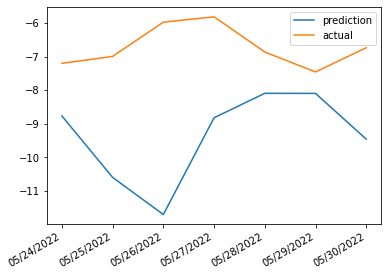

In [307]:
plt.plot(fc, label = 'prediction')
plt.plot(truth, label = 'actual')
plt.legend()
plt.setp(plt.axes().get_xticklabels(), rotation=30, horizontalalignment='right')

In [329]:
squaredErrors = []
for i in range(len(fc)):
  squaredErrors.append((fc.values[i][0] - truth.values[i][0]) ** 2)
squaredErrors = pd.Series(squaredErrors)
meanSquaredError = squaredErrors.mean()
rmse = np.sqrt(meanSquaredError)
rmse = (rmse / (np.amax(truth) - np.amin(truth))) * 100

In [333]:
print("Normalized RMSE: ", rmse[0], "%")

Normalized RMSE:  188.02051602405118 %
